In [1]:
from lambeq import BobcatParser
from discopy import grammar

## 1. String diagram

In [2]:
sentence = 'man prepares tasty meal'

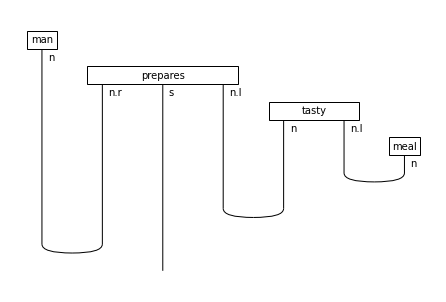

In [3]:
parser = BobcatParser(verbose='suppress')
diagram = parser.sentence2diagram(sentence)

diagram.draw()

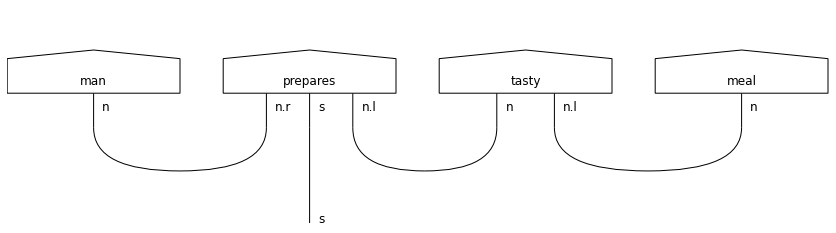

In [4]:
grammar.draw(diagram, figsize=(14,3), fontsize=12)

## 2. Rewrite

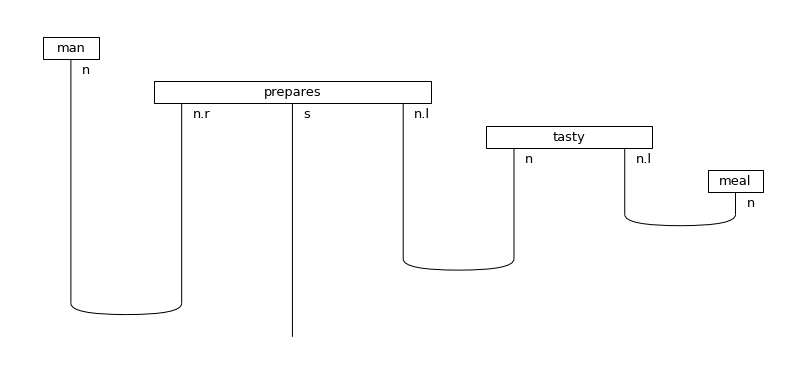

In [7]:
from lambeq import Rewriter


rewriter = Rewriter(['prepositional_phrase'])
rewritten_diagram = rewriter(diagram)

rewritten_diagram.draw(figsize=(11,5), fontsize=13)

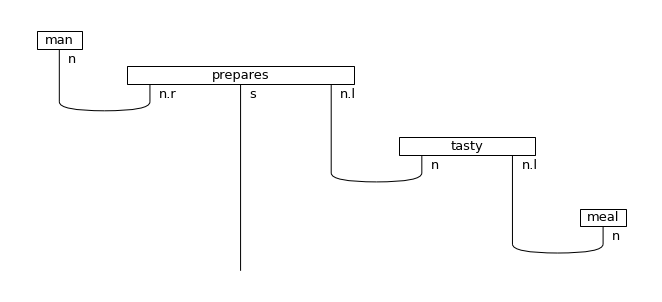

In [9]:
normalised_diagram = rewritten_diagram.normal_form()
normalised_diagram.draw(figsize=(9,4), fontsize=13)

## 3. Parameterisation

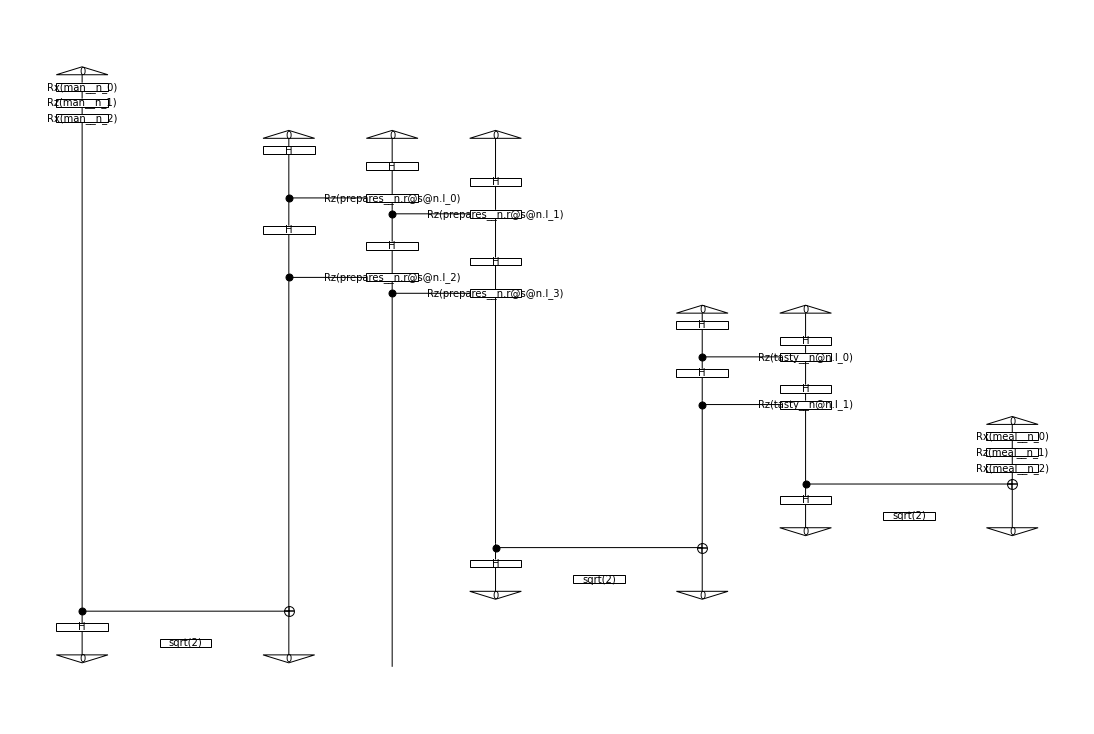

In [21]:
from lambeq import AtomicType, IQPAnsatz

# Define atomic types
N = AtomicType.NOUN
S = AtomicType.SENTENCE

# Convert string diagram to quantum circuit
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=2)
discopy_circuit = ansatz(diagram)
discopy_circuit.draw(figsize=(15,10))

In [22]:
from pytket.circuit.display import render_circuit_jupyter

tket_circuit = discopy_circuit.to_tk()

render_circuit_jupyter(tket_circuit)

### Qiskit Circuit

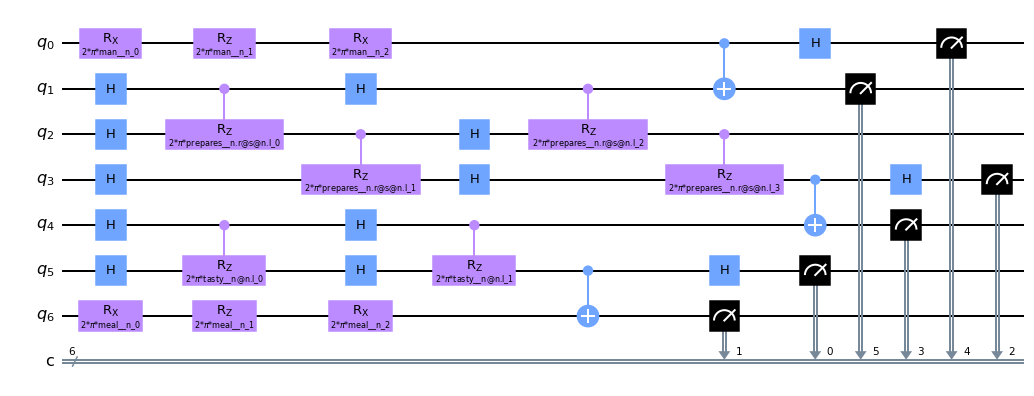

In [23]:
from pytket.extensions.qiskit import tk_to_qiskit

qiskit_circuit = tk_to_qiskit(tket_circuit)

qiskit_circuit.draw('mpl')

## Circuit symbol (equvalent to tensor in classical way) represent rotation angle in Pauli gates.
From: https://cqcl.github.io/lambeq/examples/circuit.html

In [17]:
from sympy import default_sort_key

# Make sure you sort your symbols as they are returned as a set.
parameters = sorted(tket_circuit.free_symbols(), key=default_sort_key)

param_dict = {p: i * 0.001 for i, p in enumerate(parameters)}
param_dict

{man__n_0: 0.0,
 man__n_1: 0.001,
 man__n_2: 0.002,
 meal__n_0: 0.003,
 meal__n_1: 0.004,
 meal__n_2: 0.005,
 prepares__n.r@s@n.l_0: 0.006,
 prepares__n.r@s@n.l_1: 0.007,
 prepares__n.r@s@n.l_2: 0.008,
 prepares__n.r@s@n.l_3: 0.009000000000000001,
 tasty__n@n.l_0: 0.01,
 tasty__n@n.l_1: 0.011}

In [27]:
tket_circuit.symbol_substitution(param_dict)
render_circuit_jupyter(tket_circuit)

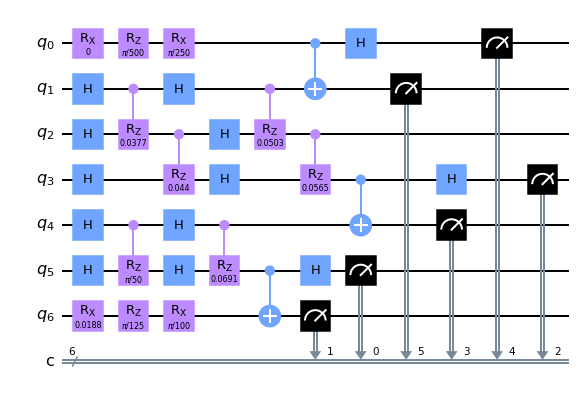

In [28]:
from pytket.extensions.qiskit import tk_to_qiskit

qiskit_circuit = tk_to_qiskit(tket_circuit)

qiskit_circuit.draw('mpl')